1. calculate the succuss rate
1. cov structure inside the data
2. traial align to an event
2. get data between two time points
3. understand how decoder is trained in bmi3d

In [1]:
import tables
import numpy as np
import matplotlib.pyplot as plt
print("Imports done! ")

Imports done! 


# get the table

In [2]:
from os import listdir
from os.path import isfile, join
temp_data_folder = 'temp_data/'

for f in listdir(temp_data_folder): print(f)
    


tmpc7h1f4fm.h5
kf_assist_0p1.h5
no_assistance.h5
sup_decoder.h5


In [3]:
#replace this with your hdf filename
fname = 'temp_data/tmpc7h1f4fm.h5'
#fname = 'temp_data/sup_decoder.h5'
hdffile = tables.open_file(fname, 'r')
print(hdffile)

temp_data/tmpc7h1f4fm.h5 (File) ''
Last modif.: 'Wed Oct 14 15:08:43 2020'
Object Tree: 
/ (RootGroup) ''
/task (Table(2099,), shuffle, zlib(5)) ''
/task_msgs (Table(51,), shuffle, zlib(5)) ''



In [4]:
task_msgs_tables = hdffile.root.task_msgs
task_tables = hdffile.root.task
print(task_tables.description)

print(task_tables)
print(task_msgs_tables.description)

Description([('cursor', '(3,)f8'), ('loop_time', '(1,)f8'), ('decoder_state', '(7, 1)f8'), ('internal_decoder_state', '(7, 1)f8'), ('target_state', '(7, 1)f8'), ('update_bmi', '(1,)f8'), ('spike_counts', '(4, 1)f8'), ('bin_edges', '(2,)f8'), ('ctrl_input', '(7,)f8'), ('assist_level', '(1,)f8'), ('target', '(3,)f8'), ('target_index', '(1,)i4')])
/task (Table(2099,), shuffle, zlib(5)) ''
Description([('msg', '()S256'), ('time', '()u4')])


# task msgs data

## look what in the data, eh

In [5]:
print(task_msgs_tables.col)


<bound method Table.col of /task_msgs (Table(51,), shuffle, zlib(5)) ''
  description := {
  "msg": StringCol(itemsize=256, shape=(), dflt=b'', pos=0),
  "time": UInt32Col(shape=(), dflt=0, pos=1)}
  byteorder := 'little'
  chunkshape := (252,)>


In [6]:
# look deeper into what is in here, eh
# zip msg and time together
msg_time = list(zip(task_msgs_tables.col('msg'), 
               task_msgs_tables.col('time')))

# returns a list of msg and time in tuples
msg_time

[(b'wait', 0),
 (b'target', 1),
 (b'hold', 2),
 (b'targ_transition', 15),
 (b'target', 16),
 (b'hold', 174),
 (b'targ_transition', 187),
 (b'reward', 188),
 (b'wait', 219),
 (b'target', 220),
 (b'hold', 462),
 (b'targ_transition', 475),
 (b'target', 476),
 (b'hold', 606),
 (b'targ_transition', 619),
 (b'reward', 620),
 (b'wait', 651),
 (b'target', 652),
 (b'hold', 810),
 (b'targ_transition', 823),
 (b'target', 824),
 (b'hold', 948),
 (b'targ_transition', 961),
 (b'reward', 962),
 (b'wait', 993),
 (b'target', 994),
 (b'hold', 1164),
 (b'targ_transition', 1177),
 (b'target', 1178),
 (b'hold', 1326),
 (b'targ_transition', 1339),
 (b'reward', 1340),
 (b'wait', 1371),
 (b'target', 1372),
 (b'hold', 1560),
 (b'targ_transition', 1573),
 (b'target', 1574),
 (b'hold', 1662),
 (b'targ_transition', 1675),
 (b'reward', 1676),
 (b'wait', 1706),
 (b'target', 1707),
 (b'hold', 1872),
 (b'targ_transition', 1885),
 (b'target', 1886),
 (b'hold', 2052),
 (b'targ_transition', 2065),
 (b'reward', 2066),
 (

skimming through this
the monkey just does nothing

let's look at couple of things
time_snap_shot = 16


this tells us what happens at what time, sort of thing

In [7]:
#b'a string'.decode('ascii')
#to convert binary string into regular string.



## use xarray to proc the data

# Trial data

# behavioural

## look at some trajectories

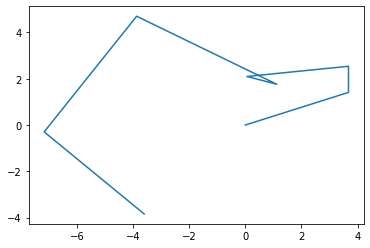

(2099, 3)

In [8]:
trial_1_reward = 284

#plot out the cursor trajectories
cursor_coor = task_tables.col('cursor')
plt.plot(cursor_coor[::trial_1_reward,0], cursor_coor[::trial_1_reward,2])
plt.show()

cursor_coor.shape


## we can bundle the behaviour and task data together
the shape and the traject is exactly the same with the trial trajectory, eh

this just shows that I have 6 trials 
and I cannot tell which trial is which, eh. 

## eye tracking (optional)

#plot out the eye tracking results
eye_array = hdffile.root.eyetracker
print(eye_array)
plt.plot(eye_array[:,0], eye_array[:,1])

## mocap data

#plot out the mocap data
mocap_array = hdffile.root.motiontracker



#  neural data

In [9]:
# see what we are dealing with

print(task_tables.description)

Description([('cursor', '(3,)f8'), ('loop_time', '(1,)f8'), ('decoder_state', '(7, 1)f8'), ('internal_decoder_state', '(7, 1)f8'), ('target_state', '(7, 1)f8'), ('update_bmi', '(1,)f8'), ('spike_counts', '(4, 1)f8'), ('bin_edges', '(2,)f8'), ('ctrl_input', '(7,)f8'), ('assist_level', '(1,)f8'), ('target', '(3,)f8'), ('target_index', '(1,)i4')])


In [10]:
cursor = np.squeeze(task_tables.col('cursor'))
decoder_state = np.squeeze(task_tables.col('decoder_state'))
internal_decoder_state = np.squeeze(task_tables.col('internal_decoder_state'))

target = np.squeeze(task_tables.col('target'))
target_state = np.squeeze(task_tables.col('target_state'))
spike_counts = np.squeeze(task_tables.col('spike_counts'))

ctrl_input = np.squeeze(task_tables.col('ctrl_input'))

print(f'decoder_state.shape: {decoder_state.shape}')


decoder_state.shape: (2099, 7)


## look at some time points
let's look at time point of what everything stacking up against


In [11]:
#from above
#msg_time

In [12]:
snap_shot_time = 178
#from looking the task_msg, at 16th time, a new peripherical target
# appears
print(f'look at time point {snap_shot_time}')

print('target:')
print(target[snap_shot_time, :])

print('cursor')
print(cursor[snap_shot_time, :])

print('decoder state:')
print(decoder_state[snap_shot_time,:])

print('internal decoder state:')
print(internal_decoder_state[snap_shot_time,:])



look at time point 178
target:
[8. 0. 0.]
cursor
[6.6917334  0.         0.09928355]
decoder state:
[ 6.6917334   0.          0.09928355  2.10881304  0.         -0.46496808
  1.        ]
internal decoder state:
[ 6.6917334   0.          0.09928355  2.10881304  0.         -0.46496808
  1.        ]


In [13]:
spike_counts[snap_shot_time,:]

array([0., 1., 0., 1.])

In [14]:
target_state[snap_shot_time,:]

array([0., 0., 0., 0., 0., 0., 0.])

In [15]:
ctrl_input[snap_shot_time,:]

array([0., 0., 0., 0., 0., 0., 0.])

## before
        sim_C = np.zeros((N_NEURONS, N_STATES))
        # control x positive directions
        sim_C[0, :] = np.array([0, 0, 0, 1, 0, 0, 0])
        sim_C[1, :] = np.array([0, 0, 0, -1, 0, 0, 0])
        # control z positive directions
        sim_C[2, :] = np.array([0, 0, 0, 0, 0, 1, 0])
        sim_C[3, :] = np.array([0, 0, 0, 0, 0, -1, 0])

## change at trial 3, after
    #configure params changes
    sim_C_new = np.zeros((N_NEURONS, N_STATES))
    sim_C_new[0, :] = np.array([0, 0, 0, 0, 1, 0, 0])
    sim_C_new[1, :] = np.array([0, 0, 0, 0, -1, 0, 0])
    # control z positive directions
    sim_C_new[2, :] = np.array([0, 0, 0, 1, 0, 0, 0])
    sim_C_new[3, :] = np.array([0, 0, 0, -1, 0, 0, 0])


they all have the same time vec? Is there a better way to bundle together the input information?

how about letting the monkey chasing a moving target?

harder while the monkey trying to learn the decoder, eh?

internal_decoder_state.shape: (2099, 7)


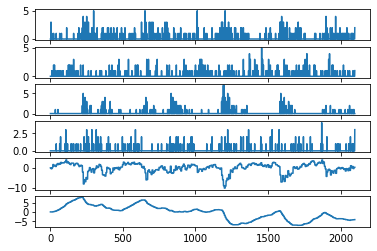

In [16]:
print(f'internal_decoder_state.shape: {internal_decoder_state.shape}')

plt.subplot(6,1,1)
plt.plot(spike_counts[:,0])

plt.subplot(6,1,2)
plt.plot(spike_counts[:,1])

plt.subplot(6,1,3)
plt.plot(spike_counts[:,2])

plt.subplot(6,1,4)
plt.plot(spike_counts[:,3])


plt.subplot(6,1,5)
plt.plot(internal_decoder_state[:,3])

plt.subplot(6,1,6)
plt.plot(cursor[:,0])
#plt.plot(internal_decoder_state[:,3])
#plt.plot(cursor[:,2])

# look at the joint spike-target cov structure
we have to be careful tho that  
we changed the decoder at middle of the experiment


## append the spike -target  arrays together

## calculate cov structure

Estimate a covariance matrix, given data and weights.
numpy.cov(m, y=None, rowvar=True)


In [17]:
cursor.shape

(2099, 3)

In [18]:
spike_counts.shape

(2099, 4)

In [19]:
spike_target = np.concatenate((spike_counts, cursor), 
                              axis=1, 
                              out=None)
spike_target.shape

(2099, 7)

In [20]:
spike_target = np.cov(spike_target.T)
spike_target.shape
spike_target

array([[ 2.95622637e-01,  6.13511087e-02,  1.37234309e-01,
         7.66725360e-02,  4.63687496e-02,  0.00000000e+00,
        -1.35949635e-02],
       [ 6.13511087e-02,  2.32740998e-01,  4.93866297e-02,
         5.65154045e-02, -4.97905867e-02,  0.00000000e+00,
         3.76457461e-02],
       [ 1.37234309e-01,  4.93866297e-02,  2.93658381e-01,
         4.43808414e-02,  4.63305531e-02,  0.00000000e+00,
         3.99570829e-03],
       [ 7.66725360e-02,  5.65154045e-02,  4.43808414e-02,
         1.40168885e-01,  6.04031859e-03,  0.00000000e+00,
        -1.40261720e-02],
       [ 4.63687496e-02, -4.97905867e-02,  4.63305531e-02,
         6.04031859e-03,  1.48006804e+01,  0.00000000e+00,
         2.44061176e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.35949635e-02,  3.76457461e-02,  3.99570829e-03,
        -1.40261720e-02,  2.44061176e+00,  0.00000000e+00,
         7.1769767

ins: display the thing

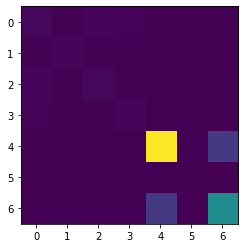

In [21]:
plt.imshow(spike_target)
#plt.imshow(spike_target[0:4, 0:4])

it is interesting in a I don't understand way. 